In [1]:
import pathlib 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
import pandas as pd
import sleepPy.preprocessing as prep
import sleepPy.plots as plot
import actiPy.actogram_plot as aplot

In [2]:
def quickplot_h(data):
    data.resample("H").mean().plot(subplots=True,
                                  figsize=(10,10))
def quickplot(data, figsize=(10, 10)):
    data.plot(subplots=True,
               figsize=figsize)

In [3]:
col_names = ["Chamber", "PIR1", "PIR2", "PIR3", "PIR4", "PIR5", "PIR6", "LDR"]

In [4]:
pir_files_dir = pathlib.Path('/Users/angusfisk/Documents/01_PhD_files/09_pirdata')

exp_filesdir = pir_files_dir / "03_experiment_files"

In [5]:
# read df's in
exp = sorted(exp_filesdir.glob("*5*"))

file = exp[2]
df = pd.read_csv(file, 
                 index_col=[0],
                 parse_dates=True)

In [6]:
df.columns=col_names
df.drop(col_names[0], axis=1, inplace=True)
df.sort_index(inplace=True)

In [7]:
df.head()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2016-09-19 14:34:01.685,0.0,0.0,0.0,0.0,0.0,0.0,43.0
2016-09-19 14:34:11.691,0.0,0.0,0.0,0.0,0.0,0.0,43.0
2016-09-19 14:34:21.697,0.0,0.0,0.0,0.0,0.0,0.0,42.0
2016-09-19 14:34:51.903,0.0,0.0,0.0,0.0,0.0,0.0,44.0
2016-09-19 14:35:01.909,0.0,0.0,0.0,0.0,0.0,0.0,43.0


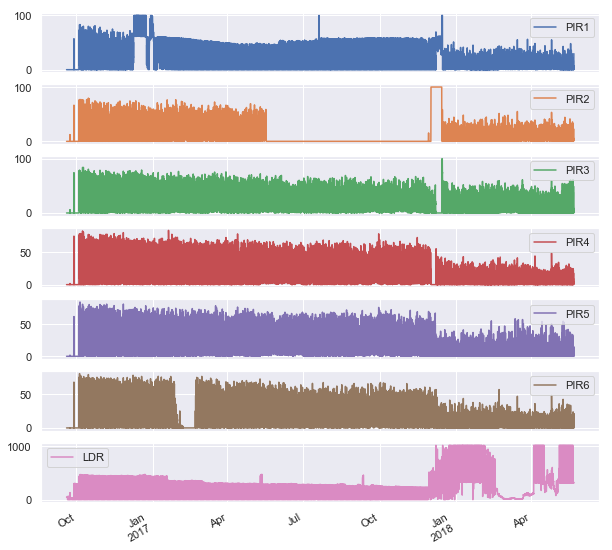

In [8]:
quickplot_h(df)

In [9]:
# Separate into just the ageing part 
start_date = "2016-10-04"
finish_date = '2017-10-04'
ageing_data = df.loc[start_date:finish_date].copy()

In [10]:
ageing_data.head()


,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2016-10-04 00:00:03.713,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:13.715,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:23.721,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:33.726,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-10-04 00:00:43.733,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
ageing_data.tail()

,PIR1,PIR2,PIR3,PIR4,PIR5,PIR6,LDR
2017-10-04 23:59:10.292,0.0,0.0,40.0,0.0,0.0,0.0,0.0
2017-10-04 23:59:20.299,0.0,0.0,30.0,0.0,0.0,0.0,0.0
2017-10-04 23:59:30.300,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-04 23:59:40.306,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-10-04 23:59:50.311,0.0,0.0,0.0,0.0,0.0,0.0,0.0


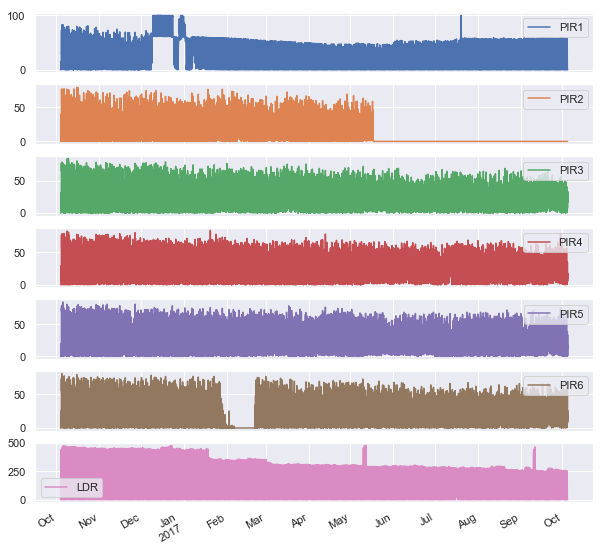

In [12]:
# check the data is all there and looks good 
quickplot_h(ageing_data)

Lots of problems going on here  
LDR running down over time  
PIR 1 corrupted from the start  
PIR 2 lost animals due to fighting  
PIR 3/4/5 fine  
PIR 6 had a month of dropout  

Plan:
Check for weekends with actogram  
Check on what PIR 1 looks like. Is it all useless or is it salvageable?  
For now remove PIR 1/2/6 and ask what the best thing to do about missing data is later.   


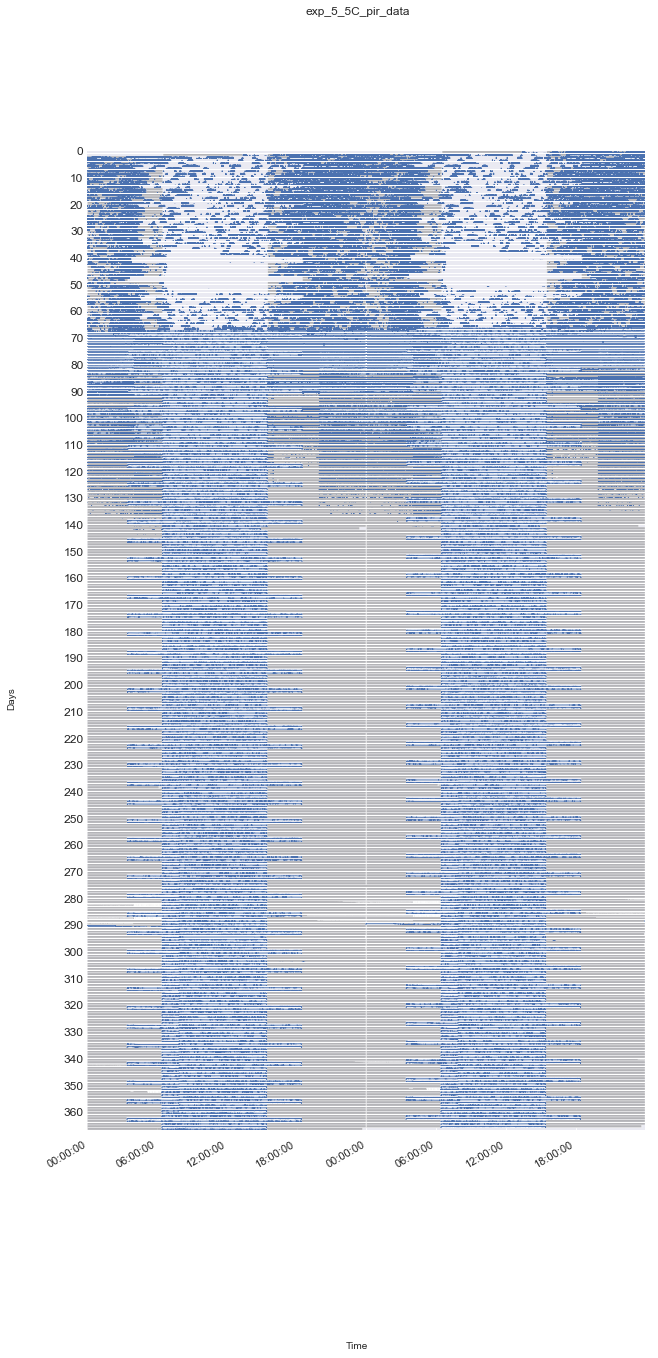

In [13]:
# Check on PIR 1
aplot._actogram_plot_from_df(ageing_data, 0, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Conclusion? PIR 1 is entirely gone and unsalvageable, looks like we had an incorrectly connected channel on the arduino so the light channel was recorded as activity.  
This should mean that the PIR 1 activity data was recorded somewhere, but it wasn't a simple swap with the light channel so unknown where it is at the moment. May chase the location up later. 

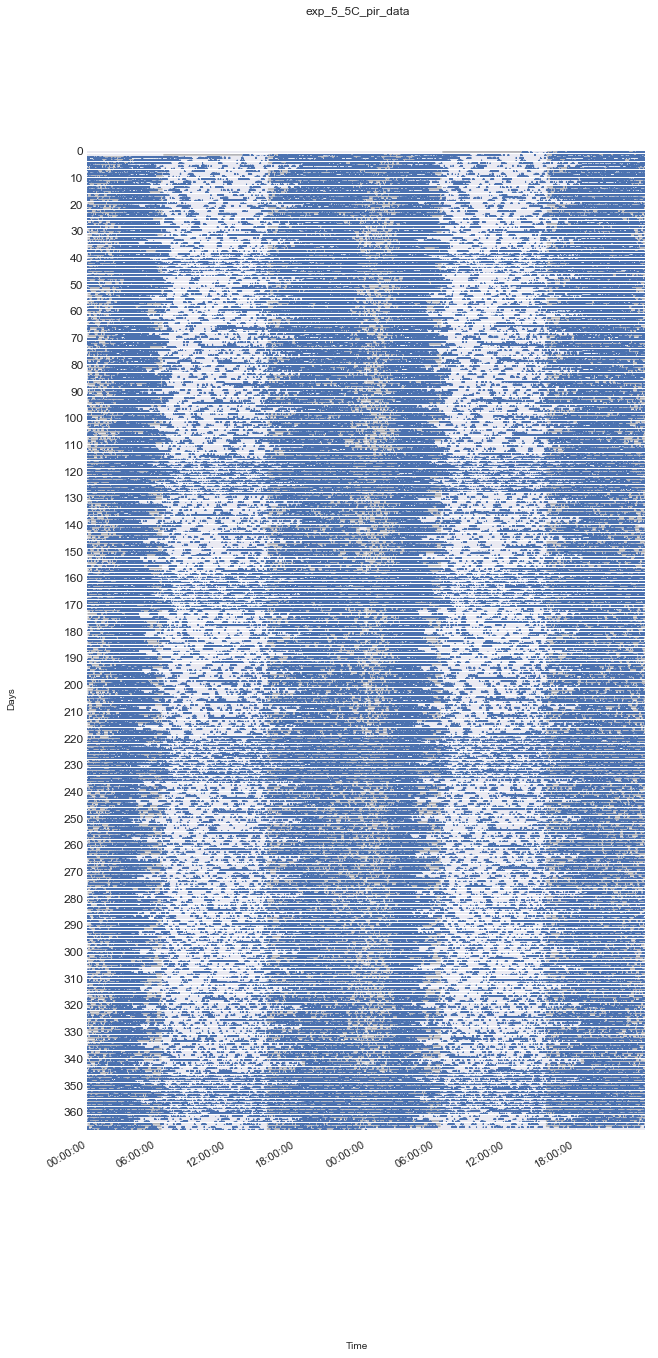

In [14]:
# Check on PIR 3
aplot._actogram_plot_from_df(ageing_data, 2, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Biggest problem is that at some points the lights invert. <- Due to LDR remap function using non-functioning PIR 1 as the test column for when to stop inverting the lights


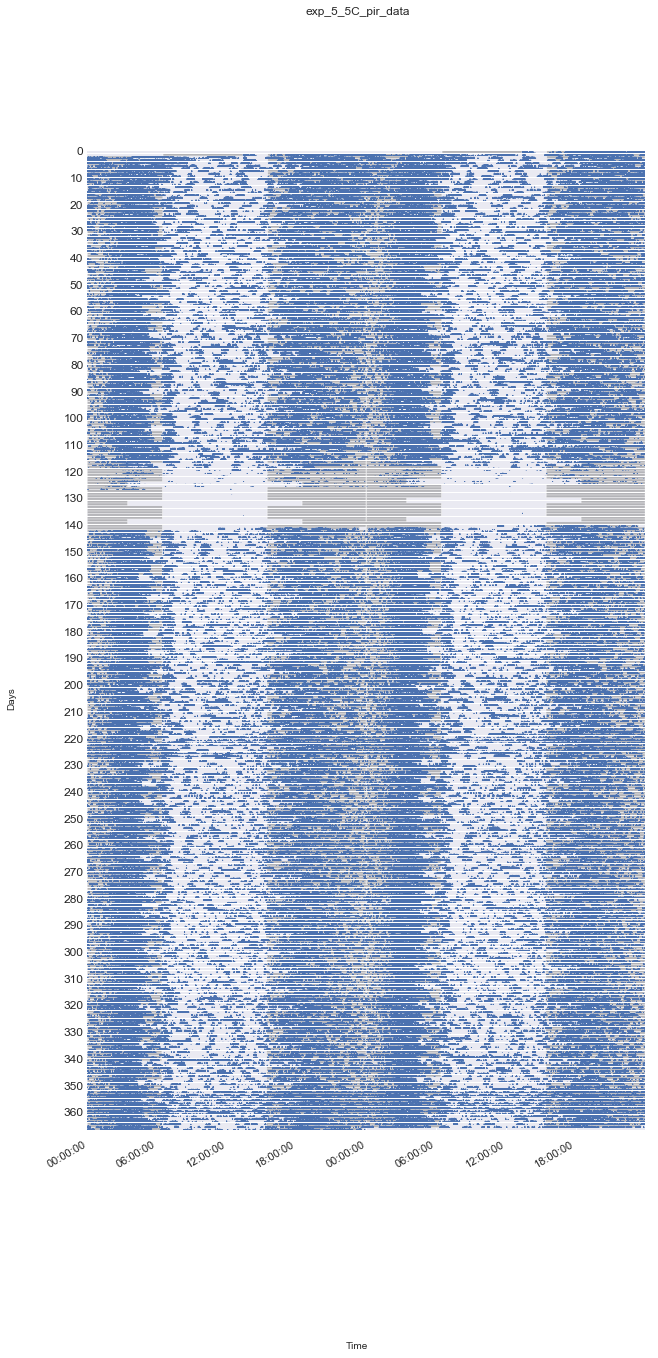

In [15]:
# Check on PIR 6 - how big is the gap? Is there any data there?
aplot._actogram_plot_from_df(ageing_data, 5, drop_level=False, fname=file, figsize=(10, 20), test_col=3)

Message is there is about a month of data missing and there is nothing there to salvage

In [16]:
ageing_data.drop([col_names[1], col_names[2], col_names[-2]], axis=1, inplace=True)

In [17]:
ageing_data.head()

,PIR3,PIR4,PIR5,LDR
2016-10-04 00:00:03.713,0.0,0.0,0.0,0.0
2016-10-04 00:00:13.715,0.0,0.0,0.0,0.0
2016-10-04 00:00:23.721,0.0,0.0,0.0,0.0
2016-10-04 00:00:33.726,0.0,0.0,0.0,0.0
2016-10-04 00:00:43.733,0.0,0.0,0.0,0.0


In [18]:
save_dir = pathlib.Path("/Users/angusfisk/Documents/01_PhD_files/"
                        "01_projects/01_thesisdata/04_ageing/01_datafiles/01_activity")

save_name = save_dir / "sj.csv" 

ageing_data.to_csv(save_name)

Now to find the post_disruption period of group housing



In [19]:
start_post = '2017-10-05'
end_post = '2017-11-23'

post_data = df.loc[start_post:end_post]

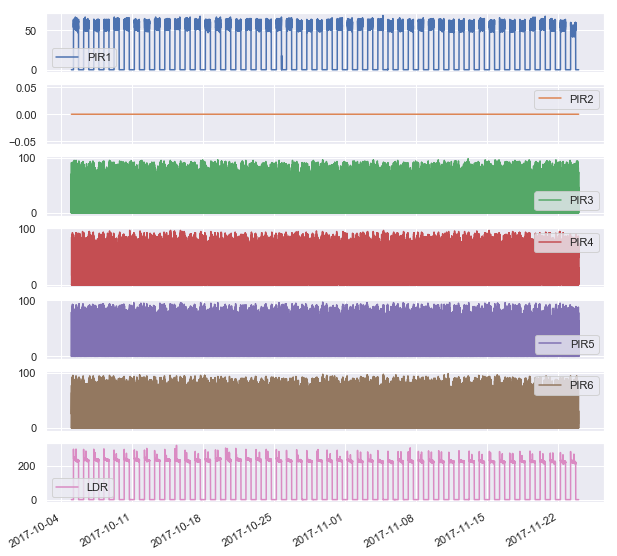

In [20]:
quickplot(post_data)

In [22]:
post_save_name = save_dir / "01_post_disrupt/sj_post.csv"

post_data.to_csv(post_save_name)